In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import alphabase.io.hdf
import alphadia.extraction.planning
import alphadia.extraction.calibration
import alphabase.psm_reader
from alphabase.statistics.regression import LOESSRegression
import alphatims.bruker

import alphatims.plotting
import alphatims.bruker
import alphatims.utils
import alphadia.extraction.utils

import os
import logging
logging.getLogger().setLevel(logging.INFO)

import pandas as pd
import numpy as np
import numba as nb

from alphadia.extraction.data import TimsTOFDIA
from alphadia.extraction.calibration import RunCalibration
from alphadia.extraction.planning import (
    Plan
)
from alphadia.extraction.candidateselection import MS1CentricCandidateSelection
from alphadia.extraction.scoring import MS2ExtractionWorkflow
from alphadia.extraction.utils import (
    recalibrate_mz
)
from alphadia.extraction.scoring import fdr_correction
from alphabase.spectral_library.base import SpecLibBase
from alphabase.spectral_library.flat import SpecLibFlat

from matplotlib import rcParams
import neptune.new as neptune
import yaml 

rcParams['font.family'] = 'Roboto'

INFO:root:Cupy is not available


In [2]:
neptune_token = os.environ['NEPTUNE_TOKEN']

# annotate library with predicted fragments
psm_lib_location = '/Users/georgwallmann/Documents/data/testing/0_brunner_2022_1ng_extraction/brunner_2022_1ng_rep01.hdf'
raw_location = '/Users/georgwallmann/Documents/data/testing/0_brunner_2022_1ng_extraction/20200827_TIMS04_EVO07_AnBr_1ng_dia_rep01_400s_30min_S1-D1_1_2944.d'
yaml_file = '../../misc/config/default.yaml'


In [3]:
run = neptune.init_run(
    project="MannLabs/alphaDIA",
    api_token=neptune_token
)

https://app.neptune.ai/MannLabs/alphaDIA/e/AL-7


Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [4]:
run["config"].upload(yaml_file)
run['version'] = 'alpha_0.1'
run["sys/tags"].add(["0_brunner_2022_1ng_extraction"])

In [5]:
plan = Plan(yaml_file)
plan.load_speclib(psm_lib_location, dense=True)

INFO:root:loading calibration config from ../../misc/config/default.yaml
INFO:root:renaming precursor columns
INFO:root:renaming fragment columns
INFO:root:retention times are most likely in minutes, will be converted to seconds


In [6]:
calibration = RunCalibration()
conf = calibration.load_yaml(yaml_file)


INFO:root:loading calibration config from ../../misc/config/default.yaml
INFO:root:found 2 calibration groups
INFO:root:(fragment) found 1 estimator(s)
INFO:root:(precursor) found 3 estimator(s)


INFO:root:Importing data from /Users/georgwallmann/Documents/data/testing/0_brunner_2022_1ng_extraction/20200827_TIMS04_EVO07_AnBr_1ng_dia_rep01_400s_30min_S1-D1_1_2944.d
INFO:root:Using .d import for /Users/georgwallmann/Documents/data/testing/0_brunner_2022_1ng_extraction/20200827_TIMS04_EVO07_AnBr_1ng_dia_rep01_400s_30min_S1-D1_1_2944.d
INFO:root:Reading frame metadata for /Users/georgwallmann/Documents/data/testing/0_brunner_2022_1ng_extraction/20200827_TIMS04_EVO07_AnBr_1ng_dia_rep01_400s_30min_S1-D1_1_2944.d
INFO:root:Reading 19,827 frames with 764,964,665 detector events for /Users/georgwallmann/Documents/data/testing/0_brunner_2022_1ng_extraction/20200827_TIMS04_EVO07_AnBr_1ng_dia_rep01_400s_30min_S1-D1_1_2944.d
100%|██████████| 19827/19827 [00:04<00:00, 4725.20it/s]
INFO:root:Indexing /Users/georgwallmann/Documents/data/testing/0_brunner_2022_1ng_extraction/20200827_TIMS04_EVO07_AnBr_1ng_dia_rep01_400s_30min_S1-D1_1_2944.d...
INFO:root:Bruker DLL not available, estimating mobi

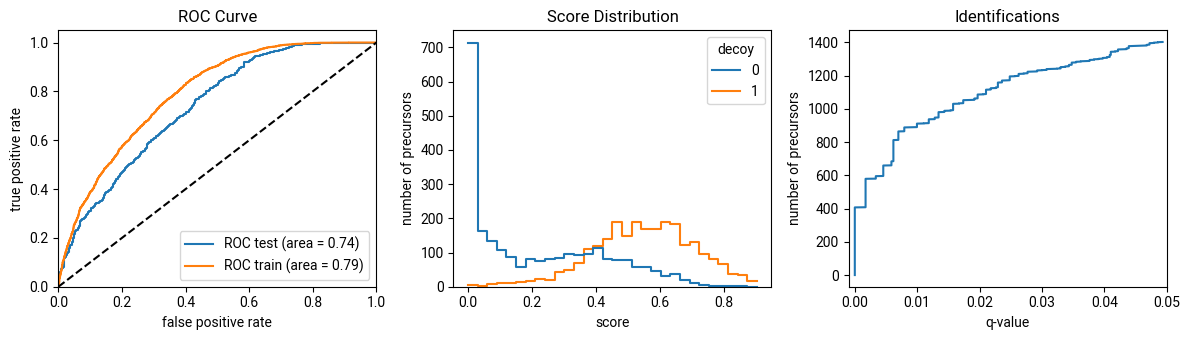

INFO:root:Found 912 features with qval < 0.01
INFO:root:calibration group: precursor, fitting mz estimator 


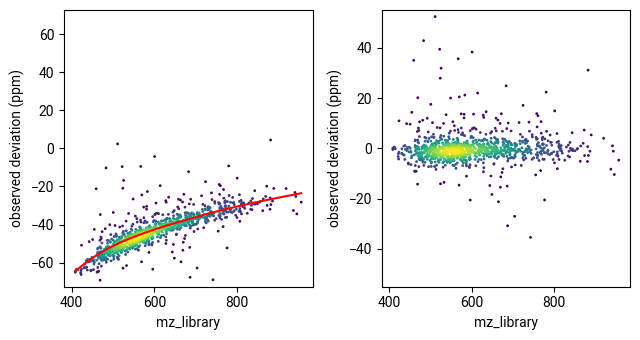

INFO:root:calibration group: precursor, fitting rt estimator 


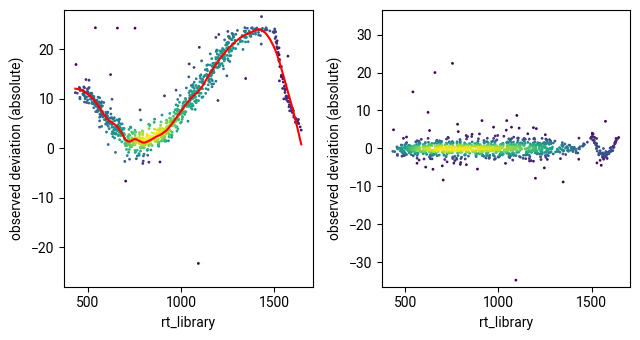

INFO:root:calibration group: precursor, fitting mobility estimator 


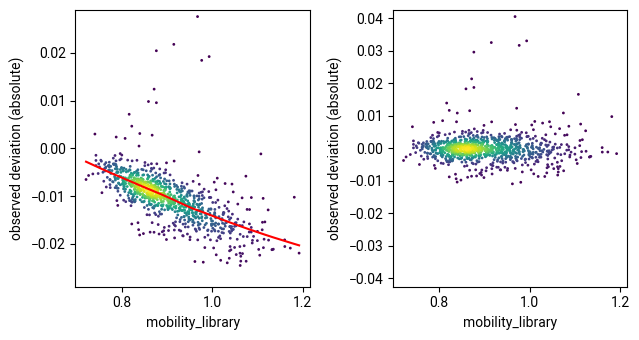

INFO:root:calibration group: fragment, fitting mz estimator 


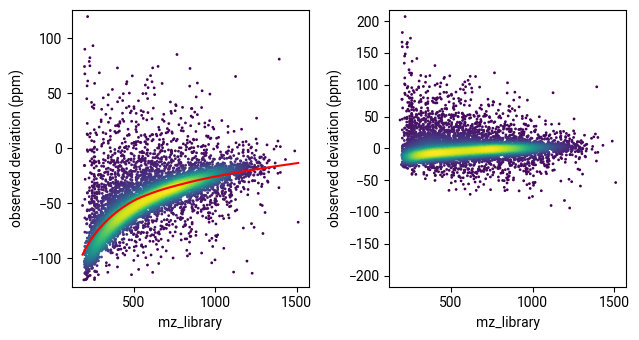

INFO:root:Starting Iteration 1, RT error 18.00s,MS1 error 48.00 ppm, MS2 error 72.00 ppm
INFO:root:calibration group: precursor, predicting mz
INFO:root:calibration group: precursor, predicting rt
INFO:root:calibration group: precursor, predicting mobility
INFO:root:calibration group: fragment, predicting mz
100%|██████████| 5000/5000 [00:05<00:00, 839.56it/s]
INFO:root:performing MS2 extraction for 4,942 candidates
100%|██████████| 4942/4942 [00:03<00:00, 1377.59it/s]
INFO:root:MS2 extraction was able to extract 4,858 sets of features for 98.30% of candidates
/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


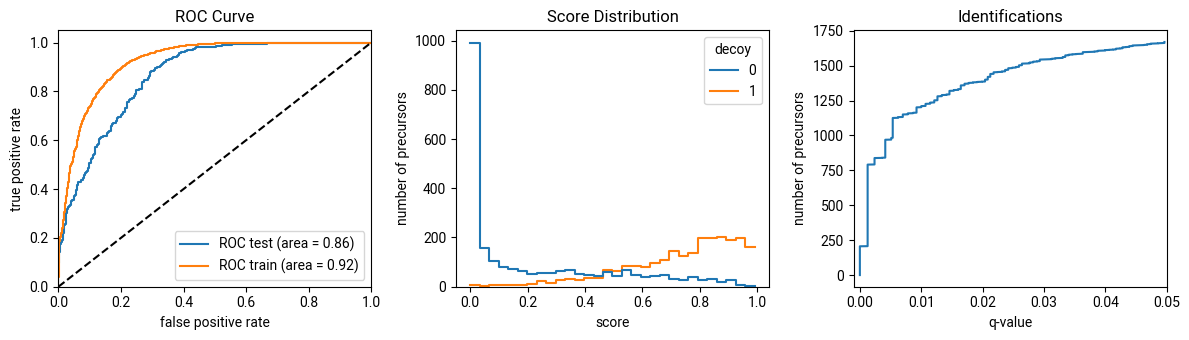

INFO:root:Found 1,202 features with qval < 0.01
INFO:root:calibration group: precursor, fitting mz estimator 


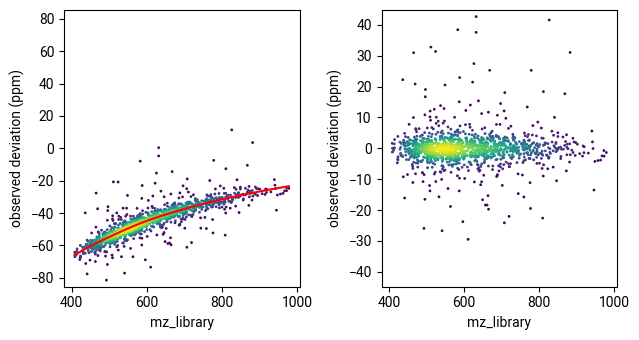

INFO:root:calibration group: precursor, fitting rt estimator 


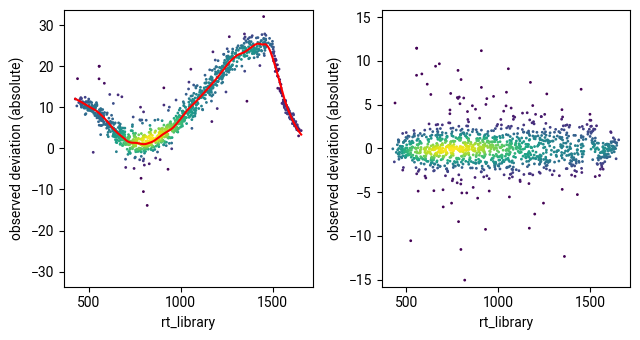

INFO:root:calibration group: precursor, fitting mobility estimator 


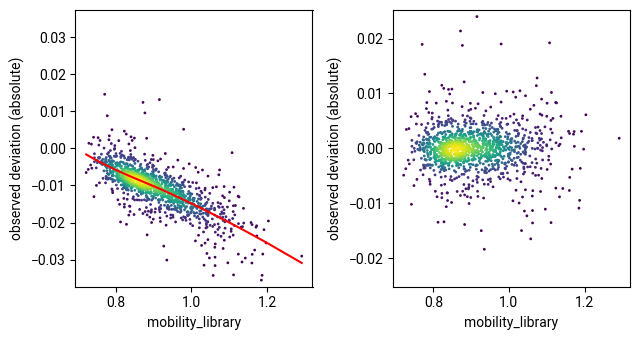

INFO:root:calibration group: fragment, fitting mz estimator 


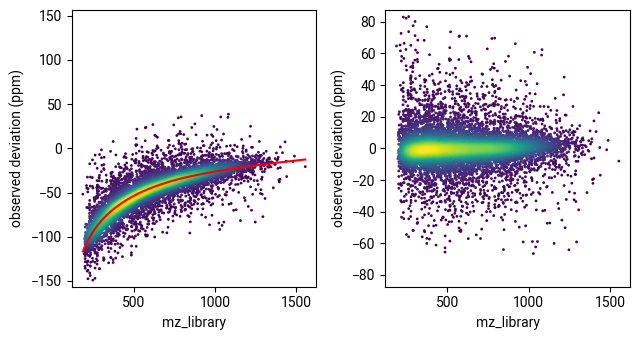

INFO:root:Starting Iteration 2, RT error 10.80s,MS1 error 28.80 ppm, MS2 error 43.20 ppm
INFO:root:calibration group: precursor, predicting mz
INFO:root:calibration group: precursor, predicting rt
INFO:root:calibration group: precursor, predicting mobility
INFO:root:calibration group: fragment, predicting mz
100%|██████████| 5000/5000 [00:03<00:00, 1448.06it/s]
INFO:root:performing MS2 extraction for 4,855 candidates
100%|██████████| 4855/4855 [00:03<00:00, 1593.60it/s]
INFO:root:MS2 extraction was able to extract 4,737 sets of features for 97.57% of candidates
/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


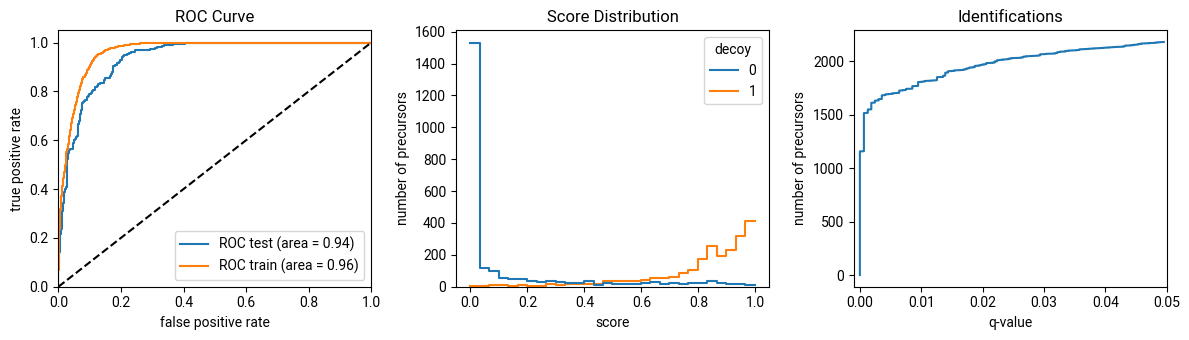

INFO:root:Found 1,807 features with qval < 0.01
INFO:root:calibration group: precursor, fitting mz estimator 


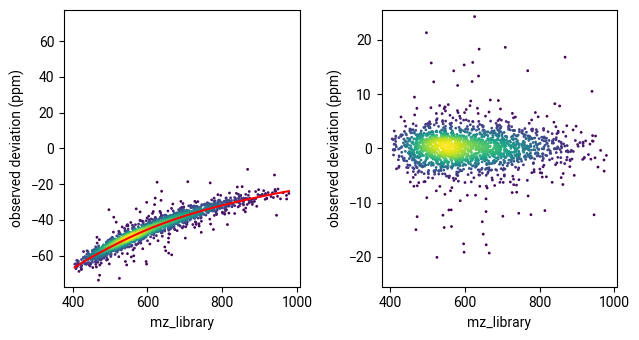

INFO:root:calibration group: precursor, fitting rt estimator 


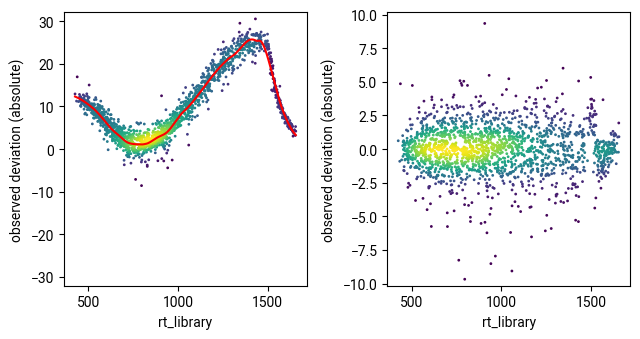

INFO:root:calibration group: precursor, fitting mobility estimator 


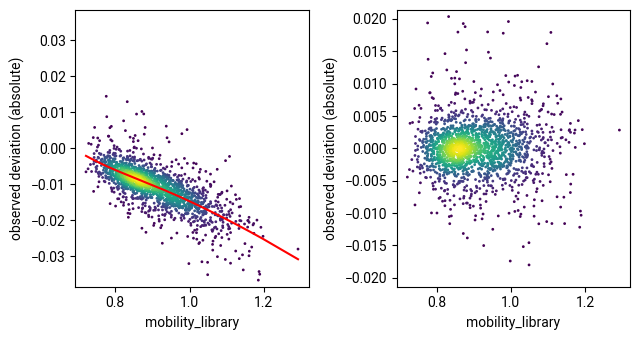

INFO:root:calibration group: fragment, fitting mz estimator 


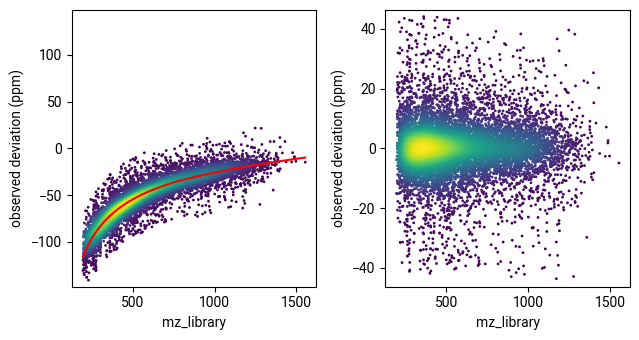

INFO:root:Starting Iteration 3, RT error 10.00s,MS1 error 17.28 ppm, MS2 error 25.92 ppm
INFO:root:calibration group: precursor, predicting mz
INFO:root:calibration group: precursor, predicting rt
INFO:root:calibration group: precursor, predicting mobility
INFO:root:calibration group: fragment, predicting mz
100%|██████████| 5000/5000 [00:03<00:00, 1651.27it/s]
INFO:root:performing MS2 extraction for 4,730 candidates
100%|██████████| 4730/4730 [00:02<00:00, 1691.98it/s]
INFO:root:MS2 extraction was able to extract 4,589 sets of features for 97.02% of candidates
/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


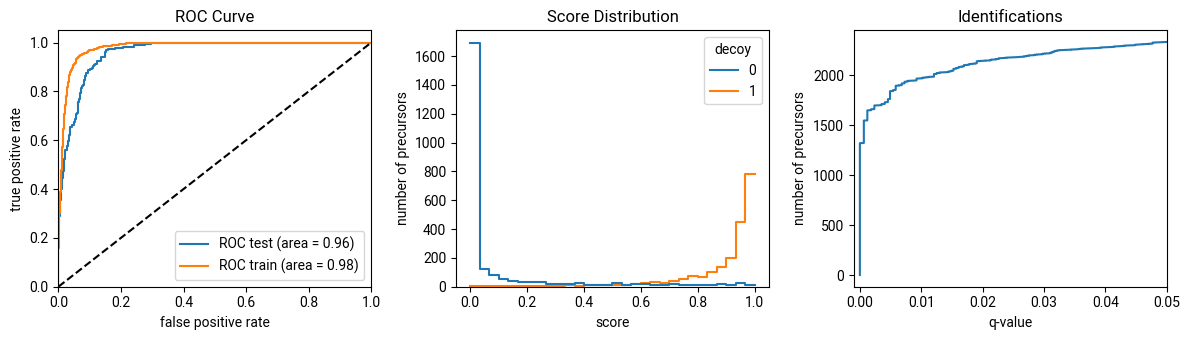

INFO:root:Found 1,967 features with qval < 0.01
INFO:root:calibration group: precursor, fitting mz estimator 


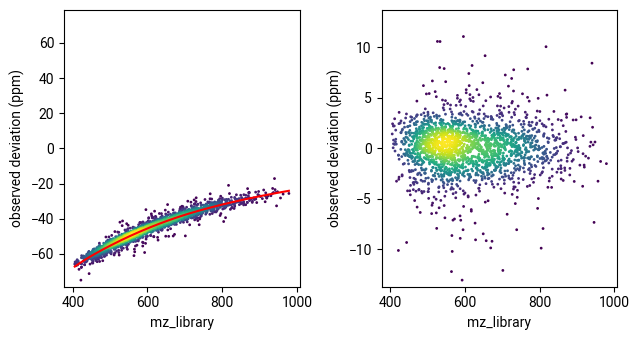

INFO:root:calibration group: precursor, fitting rt estimator 


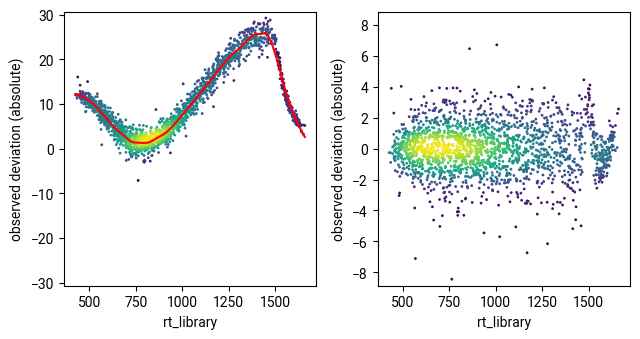

INFO:root:calibration group: precursor, fitting mobility estimator 


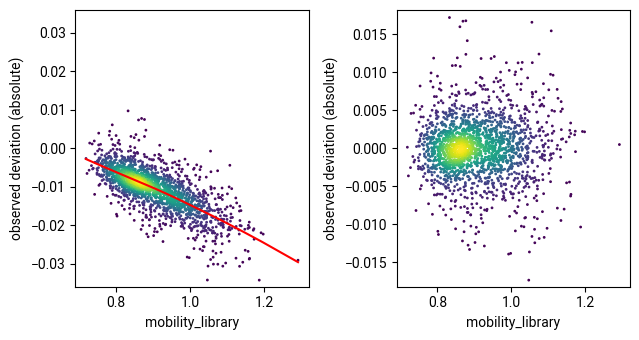

INFO:root:calibration group: fragment, fitting mz estimator 


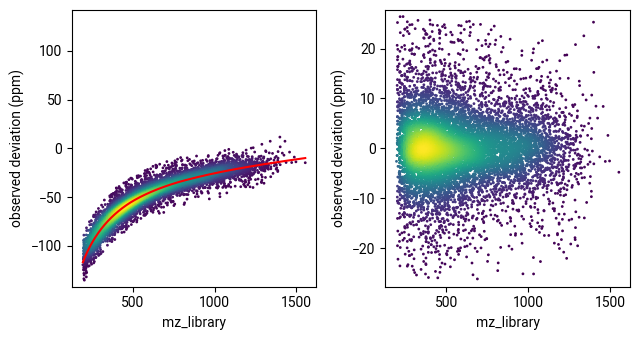

INFO:root:Starting Iteration 4, RT error 10.00s,MS1 error 10.37 ppm, MS2 error 15.55 ppm
INFO:root:calibration group: precursor, predicting mz
INFO:root:calibration group: precursor, predicting rt
INFO:root:calibration group: precursor, predicting mobility
INFO:root:calibration group: fragment, predicting mz
100%|██████████| 5000/5000 [00:02<00:00, 1980.05it/s]
INFO:root:performing MS2 extraction for 4,537 candidates
100%|██████████| 4537/4537 [00:02<00:00, 1774.03it/s]
INFO:root:MS2 extraction was able to extract 4,345 sets of features for 95.77% of candidates
/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


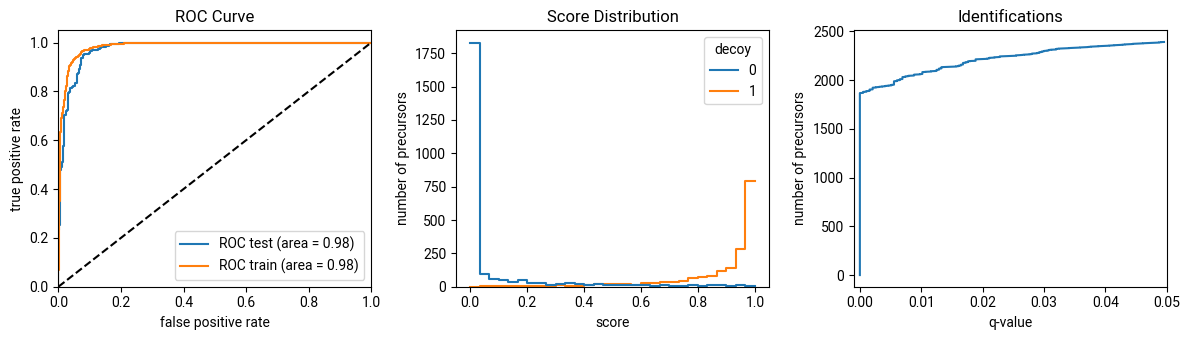

INFO:root:Found 2,062 features with qval < 0.01
INFO:root:calibration group: precursor, fitting mz estimator 


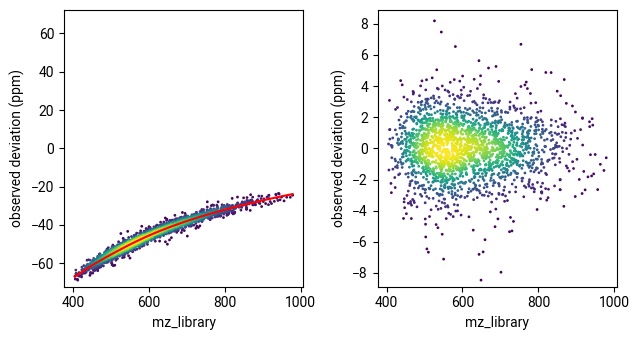

INFO:root:calibration group: precursor, fitting rt estimator 


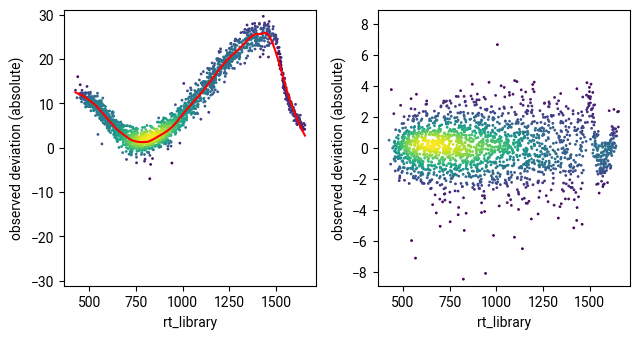

INFO:root:calibration group: precursor, fitting mobility estimator 


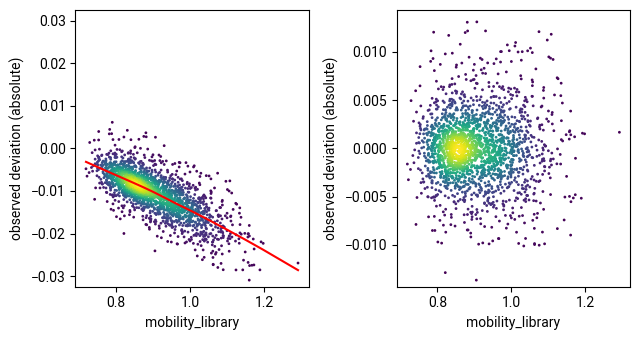

INFO:root:calibration group: fragment, fitting mz estimator 


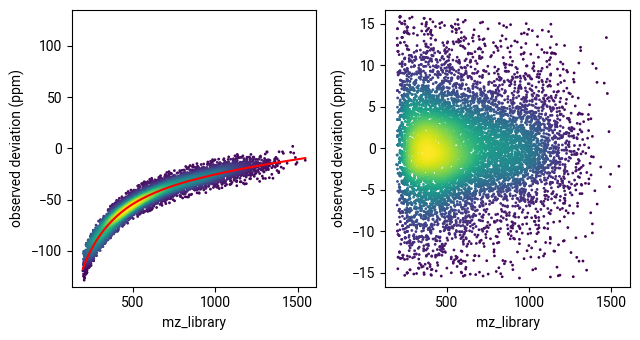

INFO:root:Starting Iteration 5, RT error 10.00s,MS1 error 10.00 ppm, MS2 error 15.00 ppm
INFO:root:calibration group: precursor, predicting mz
INFO:root:calibration group: precursor, predicting rt
INFO:root:calibration group: precursor, predicting mobility
INFO:root:calibration group: fragment, predicting mz
100%|██████████| 5000/5000 [00:02<00:00, 2332.09it/s]
INFO:root:performing MS2 extraction for 4,412 candidates
100%|██████████| 4412/4412 [00:02<00:00, 2008.34it/s]
INFO:root:MS2 extraction was able to extract 4,200 sets of features for 95.19% of candidates
/Users/georgwallmann/miniconda3/envs/alpha/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


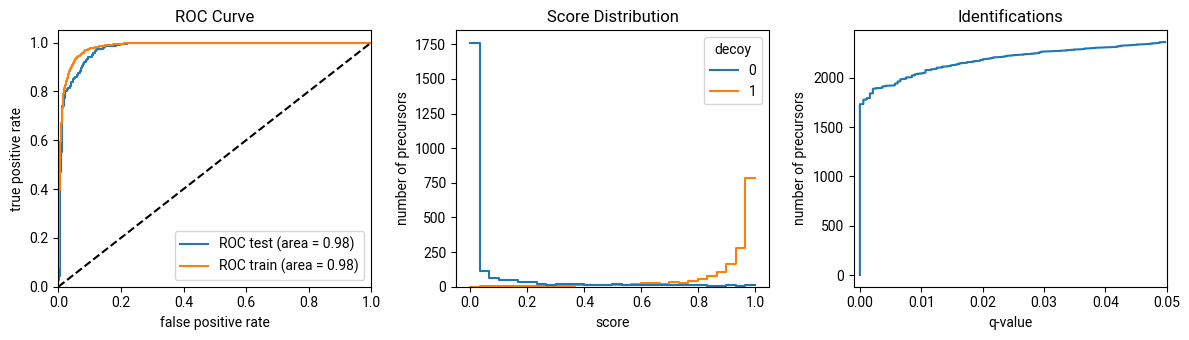

INFO:root:Found 2,044 features with qval < 0.01
INFO:root:calibration group: precursor, fitting mz estimator 


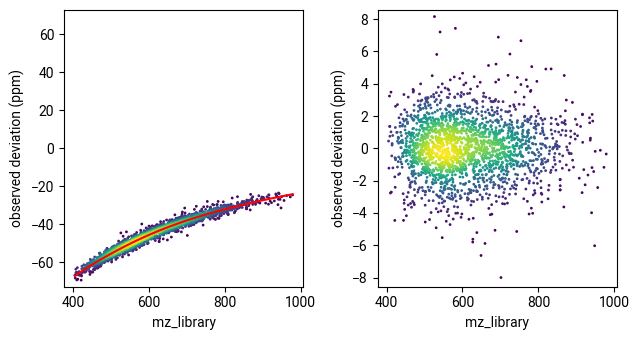

INFO:root:calibration group: precursor, fitting rt estimator 


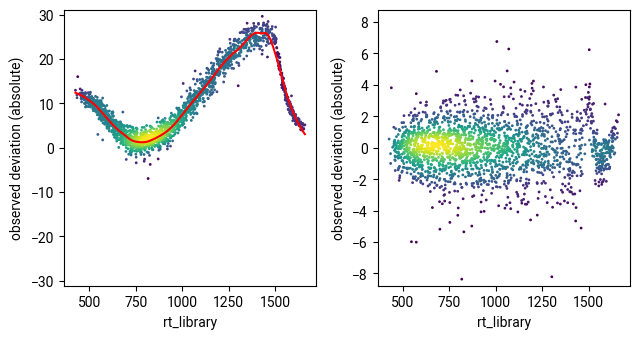

INFO:root:calibration group: precursor, fitting mobility estimator 


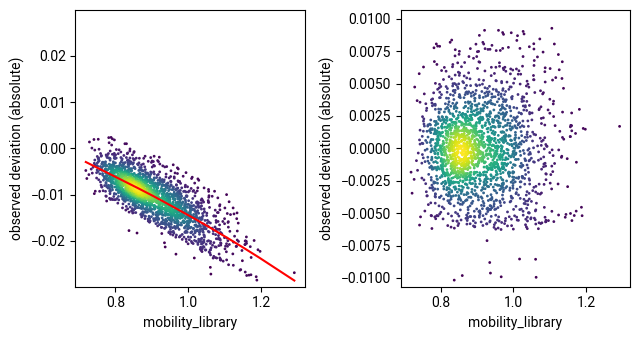

INFO:root:calibration group: fragment, fitting mz estimator 


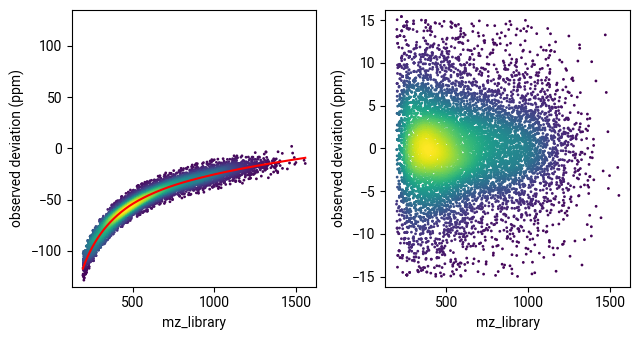

INFO:root:Ending iteration 5, target_reached


In [7]:
profiling = []


dia_data = TimsTOFDIA(raw_location)

initial_ms1_error = 80
initial_ms2_error = 120
initial_rt_error = 30

target_ms1_error = 10
target_ms2_error = 15
target_rt_error = 10


mobility_99 = 0.03

iteration = 0

precursors_flat, fragments_flat = plan.speclib.precursor_df.sample(5000), plan.speclib.fragment_df

while initial_ms1_error >= target_ms1_error or iteration < 1:
    logging.info(f'Starting Iteration {iteration}, RT error {initial_rt_error:.2f}s,MS1 error {initial_ms1_error:.2f} ppm, MS2 error {initial_ms2_error:.2f} ppm')
    
    
    calibration.predict(precursors_flat, 'precursor')
    calibration.predict(fragments_flat, 'fragment')

    run["eval/iteration"].log(iteration)
    if iteration == 0:
        column_type = 'library'
        num_candidates = 2
    else:
        column_type = 'calibrated'
        num_candidates = 1

    extraction = MS1CentricCandidateSelection(
        dia_data,
        precursors_flat, 
        rt_column = f'rt_{column_type}',
        mobility_column = f'mobility_{column_type}',
        precursor_mz_column = f'mz_{column_type}',
        rt_tolerance=initial_rt_error,
        mobility_tolerance=mobility_99,
        num_candidates=num_candidates,
        num_isotopes=2,
        mz_tolerance=initial_ms1_error,
    )
    candidates_df = extraction()
    
            
    candidates_filtered = candidates_df[candidates_df['fraction_nonzero'] > 0.0]
    extraction = MS2ExtractionWorkflow(
        dia_data,
        precursors_flat, 
        candidates_filtered,
        fragments_flat,
        coarse_mz_calibration = False,
        rt_column = f'rt_{column_type}',
        mobility_column = f'mobility_{column_type}',
        precursor_mz_column = f'mz_{column_type}',
        fragment_mz_column = f'mz_{column_type}',
        precursor_mass_tolerance=initial_ms1_error,
        fragment_mass_tolerance=initial_ms2_error,
    )
    
    
    features_df = extraction()
    features_df['decoy'] = precursors_flat['decoy'].values[features_df['index'].values]
    features_df['charge'] = precursors_flat['charge'].values[features_df['index'].values]
    features_df['nAA'] = precursors_flat['nAA'].values[features_df['index'].values]

    
    features_df = fdr_correction(features_df, neptune_run=run)


    feature_filtered = features_df[features_df['qval'] < 0.01]
    run["eval/precursors"].log(len(feature_filtered))
    logging.info(f'Found {len(feature_filtered):,} features with qval < 0.01')
    
    calibration.fit(feature_filtered,'precursor', plot=True, neptune_run=run)
    m1_70 = calibration.get_estimator('precursor', 'mz').ci(features_df, 0.7)[0]
    m1_99 = calibration.get_estimator('precursor', 'mz').ci(features_df, 0.99)[0]
    rt_70 = calibration.get_estimator('precursor', 'rt').ci(features_df, 0.7)[0]
    rt_99 = calibration.get_estimator('precursor', 'rt').ci(features_df, 0.7)[0]
    mobility_99 = calibration.get_estimator('precursor', 'mobility').ci(features_df, 0.99)[0]

    
    run["eval/99_ms1_error"].log(m1_99)
    run["eval/99_rt_error"].log(rt_99)
    run["eval/99_mobility_error"].log(mobility_99)

    fragment_calibration_df = alphadia.extraction.scoring.unpack_fragment_info(feature_filtered)
    fragment_calibration_df = fragment_calibration_df.sort_values(by=['intensity'], ascending=True).head(10000)

    calibration.fit(fragment_calibration_df,'fragment', plot=True, neptune_run=run)
    m2_70 = calibration.get_estimator('fragment', 'mz').ci(fragment_calibration_df, 0.7)[0]
    m2_99 = calibration.get_estimator('fragment', 'mz').ci(fragment_calibration_df, 0.99)[0]

    run["eval/99_ms2_error"].log(m2_99)

    #rt_99 = calibration.get_estimator('precursor', 'rt').ci(features_df, 0.99)[0]
    #mobility_99 = calibration.get_estimator('precursor', 'mobility').ci(features_df, 0.99)[0]

    if initial_ms1_error == target_ms1_error and initial_ms2_error == target_ms2_error:
        logging.info(f'Ending iteration {iteration}, target_reached')
        break

    initial_ms1_error = max(m1_70, target_ms1_error, initial_ms1_error * 0.6)
    initial_ms2_error = max(m2_70, target_ms2_error, initial_ms2_error * 0.6)
    initial_rt_error = max(rt_70, target_rt_error, initial_rt_error * 0.6)

    iteration += 1

  